<a href="https://colab.research.google.com/github/ali1810/Deep_Chem/blob/main/rdkit_basic%26Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence : 
When System/Software /Machine can behave or act or solve problem  like human brain then It is called Artificial Intelligence. 

# Machine Learning :

In order to make System /Software /Machine to act like human brains, It needs to get train the system with the use of function which can give the result as expeceted based on the given input.

# Type of Machine learning 

Broadly machine learning depend on what kind of problem you are going to solve with this... either you  predict or make clustering. 

Prediction is the process of making machine to learn based on the diffrent input data and when you pass the data then it predict what could be outcome based on the learning. 
When it predict the numerical nuumber like price of the house then it is reffred to as Regression.

When it predict the binary like Yes or No then it is called Classification. 





In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:41
🔁 Restarting kernel...


In [ ]:
### Installing RDKIT 
!mamba install -c conda-forge rdkit

Streaming output truncated to the last 5000 lines.
python-dateutil          [] (00m:00s) Waiting...
numpy                    [] (00m:00s) Waiting...
xorg-kbproto             [] (00m:00s) Waiting...
xorg-libsm               [] (00m:00s) Waiting...
rdkit                    [] (00m:00s)     13 MB /     38 MB ( 11.47 MB/s)
xorg-libxext             [] (00m:00s) Waiting...
sqlalchemy               [] (00m:00s) Waiting...
xorg-renderproto         [] (00m:00s) Waiting...
cycler                   [] (00m:00s) Waiting...
xorg-xproto              [] (00m:00s) Waiting...
greenlet                 [] (00m:00s) Waiting...
freetype                 [] (00m:00s) Waiting...
libgfortran-ng           [] (00m:00s) Waiting...
lcms2                    [] (00m:00s) Waiting...
libwebp-base             [] (00m:00s) Waiting...
pyparsing                [] (00m:00s) Waiting...
pcre                     [] (00m:00s) Waiting...
libopenblas              [] (00m:00s)      7 MB /      9 MB (  5.73 MB/s)
matplotlib-base  

In [ ]:
## Importing Chem libaray from RDkit ...
from rdkit import Chem 

In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import pandas as pd 

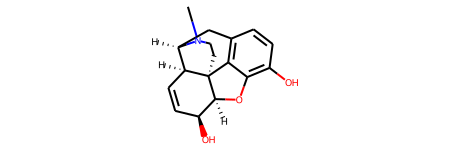

In [ ]:
## Represent the molecule in Graphic format 
mol = Chem.MolFromSmiles("[H][C@@]12OC3=C(O)C=CC4=C3[C@@]11CCN(C)[C@]([H])(C4)[C@]1([H])C=C[C@@H]2O")
# Default
mol

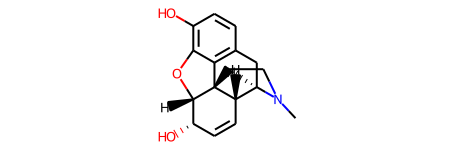

In [ ]:
### From the go.drugbank.com we can get "mol" which is more structure way to representing molecule 
import requests
morphine_url="https://go.drugbank.com/structures/small_molecule_drugs/DB00295.mol"
morphine_mol=requests.get(morphine_url).text 
morphine_m=Chem.MolFromMolBlock(morphine_mol)
morphine_m



In [ ]:
## Number of Atoms //
morphine_m.GetNumAtoms()

21

In [ ]:
## Using list comprehension to get the atoms in Morphine but without Hydrozen ....

[atom.GetSymbol() for atom in morphine_m.GetAtoms()]

['O',
 'O',
 'O',
 'N',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C']

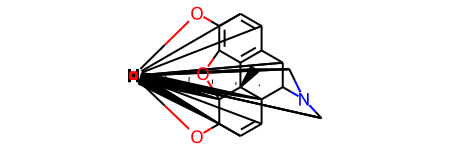

In [ ]:
### Get Hydrozen along with this 
morphine_with_hydrozen=Chem.AddHs(morphine_m)
morphine_with_hydrozen

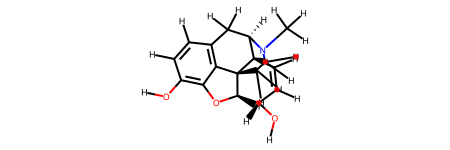

In [ ]:
## With Allchem component we can get hydrozen at different axis 

AllChem.Compute2DCoords(morphine_with_hydrozen)
morphine_with_hydrozen

In [ ]:
## Concept of descriptors :: Its is usefull when comparing numerically one family of 
# compound with another family of compound  in several quatitative ways 
# Descriptor is function which assign numbers to molecules 

from rdkit.Chem import Descriptors
## The most basic descriptor is Numner of atoms in molecules
m= morphine_m.GetNumAtoms()
print(" The numebr of Atoms in Morphine is -->", m)

## To find the molecular weight ...
w=Descriptors.MolWt(morphine_m)
print(" The Weight of  Morphine is -->", w)

## To find the another descriptor is logp

logp=Descriptors.MolLogP(morphine_m)
print(" The value of logp in Morphine is -->", logp)




 The numebr of Atoms in Morphine is --> 21
 The Weight of  Morphine is --> 285.34299999999996
 The value of logp in Morphine is --> 1.1980999999999997


In [ ]:
## Based on the descriptor we can find the drug follow the rule of five 

# Lipinski's rule of five, also known as Pfizer's rule of five or simply the rule of five (RO5), 
# is a rule of thumb to evaluate druglikeness or determine if a chemical compound with 
# a certain pharmacological or biological activity has chemical properties and physical 
# properties that would make it a likely orally active drug in humans.

In [ ]:
import sys 
sys.path.append('usr/local/lib/python3.7/site-packages/')

In [ ]:
###Downloading the datasets
%%bash
wget = https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv

--2021-05-27 20:52:44--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-05-27 20:52:44--  https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96699 (94K) [text/plain]
Saving to: ‘delaney-processed.csv.1’

     0K .......... .......... .......... .......... .......... 52% 1.96M 0s
    50K .......... .......... .......... .......... ....      100% 5.40M=0.03s

2021-05-27 20:52:45 (2.80 MB/s) - ‘delaney-processed.csv.1’ saved [96699/96699]

FINISHED --2021-05-27 20:52:45--
Total wall clock time: 0.6s
Downloaded: 1 files, 94K in 0.03s (2.80 MB/s)


In [ ]:
from rdkit.Chem import PandasTools
## Taking data in to pandas dataframe 
data=pd.read_csv('delaney-processed.csv')
#[['Compound ID','smiles','measured log solubility in mols per litre']]
data.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [ ]:
data.shape

(1128, 10)

In [ ]:
## To get structure from smiles we use pandas tools
PandasTools.AddMoleculeColumnToFrame(data,'smiles','molecules')
data.head()

In [ ]:
## Now dropping smiles column 
data=data.drop(columns='smiles')
data.head()


In [ ]:
## Changing the long column name in short 

data=data.rename(columns={'measured log solubility in mols per litre':'Solubility'})
data.head()

In [ ]:
## Sort the data based on the value of Solubility 
data.sort_values(by=['Solubility']).head()
data.sort_values(by=['Solubility'],ascending=False).head()


In [ ]:
## Creating high solubility dataframe :::

High_soluble=data.loc[(data['Solubility'])>=1.0]
High_soluble.sort_values(by=['Solubility']).head()

In [ ]:
## WE can add the column Molecular wieght with dataframe

data['Mol_Weight']=[Descriptors.MolWt(mol) for mol in data['molecules']]
data.head()
                    

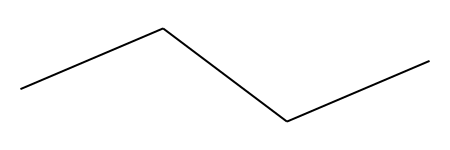

In [ ]:
# Graphical representation of Butane with use of 'SMILES'
mol = Chem.MolFromSmiles('CCCC')
# Default
mol

In [ ]:
### Finding simles with Graphical represnebtation ::;

smile=Chem.MolToSmiles(mol)
smile



NameError: ignored

In [ ]:
## Finding out the molecular weight 
mw=Descriptors.MolWt(mol)
mw

NameError: ignored

In [ ]:
## Finding the comparative pattern among the group of Amino acids..Glyceine, Phenylalanine,Histidine,Cysteine
amino_acid=['C(C(=O)O)N','N[C@@H](CC1=CC=CC=C1)C(O)=O','O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S']
mol_list=[]
for mol in amino_acid:
  mol = Chem.MolFromSmiles(mol)
  mol_list.append(mol)
img=Draw.MolsToGridImage(mol_list,molsPerRow=4)
img 
    

In [ ]:
## Which molecule has sulphur in it ??

#pattern = Chem.MolFromSmiles('S') ## Pattern for sulphur Group 
#pattern = Chem.MolFromSmiles('C(=O)C') ## Cobaxal group 
#pattern = Chem.MolFromSmiles('CC(N)C') ## Nitrozen attached to carbon
pattern = Chem.MolFromSmarts('[r5]') 
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))
  

False
False
True
False


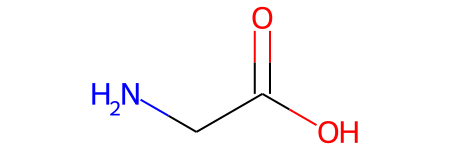

In [ ]:
# Finding the fingerprint 

# Finferprint are the way of automate to find the alla the pattern of molecule...  

Glycine=mol_list[0]
Glycine

In [ ]:
bi={}
fp= AllChem.GetMorganFingerprintAsBitVect(Glycine, 2 ,nBits =1024,bitInfo=bi)
fp_arr=np.zeros((1,0))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]

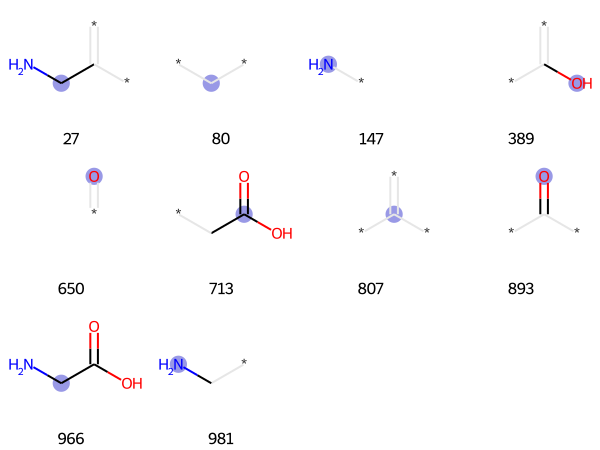

In [ ]:
# Detail representation of molecules 
print=[(Glycine,x,bi)for x in fp.GetOnBits()]
Draw.DrawMorganBits(print, molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()])